# Assignment week 10,11
Rosa Kurtz

### 1) 8.12 RK2 and Verlot

When it is at its closest point, or perihelion, it is moving precisely tangentially (i.e., perpendicular to the line between itself and the Sun) and it has distance 1.4710 × 10^11 m from the Sun and linear velocity 3.0287 × 10^4 m s−1.

r" = −(GM r)/|r|^3 , (vector r=(x,y))

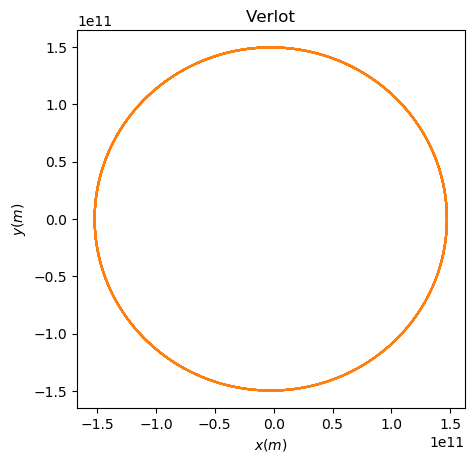

In [69]:
## rk2 with array method 

# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import cos, exp, log, pi, sin, sqrt

# SciPy
import scipy.integrate as ode

#constants
G=6.6738*10**-11 #m^3 kg^-1 s^-2
M=1.9891*10**30 #kg

#initial conditions  -let sun be origin 
x0=1.4710 * 10**11 #m   (x,0) par to line
sp0=3.0287 * 10**4  #m/s (0,y) perp to line

v0=np.array([0, sp0])
r0=np.array([x0, 0])
p0=np.array([x0, 0, 0, sp0])

#print(v0)
#print(r0)


h=1 #1 hour
h=3600 #1 hr in secs
dt=3600

## time steps
st=10

def a(x): #where r=r(x,y) and r" will also have comp.s (x,y) returns a_x and a_y
    rx=x[0]
    ry=x[1]
    
    r=np.zeros(2)
    
    d=sqrt(rx**2 + ry**2)
    r[0]= -(G*M*rx)  /  (d**3)
    r[1]= -(G*M*ry)  /  (d**3)
    return r

#def verlot(f, t0, tf, p, dt): 
    #return 
 
    

def verlot(f, t0, tf, p0, dt):  ##where p0 is a 1 d array with 4 elements x10,w10,x20,w20
    t=np.array([t0])
    r0=np.array([ p0[0] , p0[1] ])
    v0=np.array([ p0[2] , p0[3] ])
    
    x=np.array([r0])
    v=np.array([v0])
    #k1=np.zeros(len(p0))
    #k2=np.zeros(len(p0))
    
    
    while t[-1] < tf:
        if(len(t)%2==0): ##if t is even => odd
            v=np.vstack((v, v[-1] + a(x[-1])*(dt/2) ))
            t=np.vstack((t, t[-1] + dt/2))
        else: ##if t is odd => even
            
            x=np.vstack((x, x[-1] + v[-1]*(dt)) )
            v=np.vstack((v, v[-1] + a(x[-1])*(dt/2) ))
            t=np.vstack((t, t[-1] + dt/2))
        
    return x,v,t


t0= 0.0
tf= 50000*60*60 ##3 hr in s
dt=3600

#t0= 0.0
#tf= 1000 ##3 hr in s
#dt= 1

x0=1.4710 * 10**11 #m   (x,0) par to line
sp0=3.0287 * 10**4  #m/s (0,y) perp to line

v0=np.array([0, sp0])
r0=np.array([x0, 0])
p0=np.array([x0, 0, 0, sp0])

x,v,t = verlot(a, t0, tf, p0, dt)


xp= x[0:len(t),0]
yp= x[0:len(t),1]




# Plot
plt.figure(figsize=(5,5),dpi=100)
plt.plot( xp, yp, 'C1')
plt.ylabel(r'$y(m)$')
plt.xlabel(r'$x(m)$')
plt.title("Verlot")

plt.show()
    


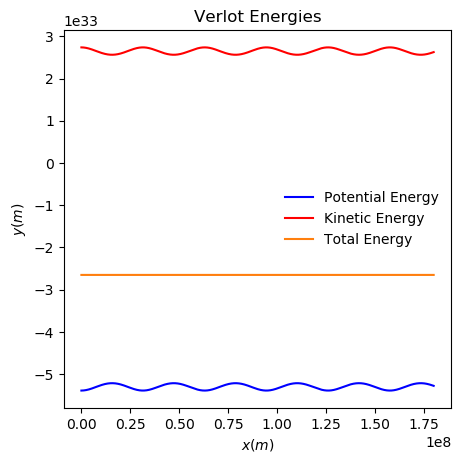

In [71]:
##verlot energy

# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import cos, exp, log, pi, sin, sqrt

# SciPy
import scipy.integrate as ode

#constants
G=6.6738*10**-11 #m^3 kg^-1 s^-2
M=1.9891*10**30 #kg
m=5.9722*10**24

#initial conditions  -let sun be origin 
x0=1.4710 * 10**11 #m   (x,0) par to line
sp0=3.0287 * 10**4  #m/s (0,y) perp to line

v0=np.array([0, sp0])
r0=np.array([x0, 0])
p0=np.array([x0, 0, 0, sp0])

#print(v0)
#print(r0)


h=1 #1 hour
h=3600 #1 hr in secs
dt=3600

## time steps
st=10

def a(x): #where r=r(x,y) and r" will also have comp.s (x,y) returns a_x and a_y
    rx=x[0]
    ry=x[1]
    
    r=np.zeros(2)
    
    d=sqrt(rx**2 + ry**2)
    r[0]= -(G*M*rx)  /  (d**3)
    r[1]= -(G*M*ry)  /  (d**3)
    return r


def En(x,v): 
    rx=x[0]
    ry=x[1]
    
    vx=v[0]
    vy=v[1]
    
    d=sqrt(rx**2 + ry**2)
    s=sqrt(vx**2 + vy**2)
    
    U= -(G*M*m)/(d)
    T= .5*m*(s**2)
    return U, T, U+T
    
    

def verlot(f, t0, tf, p0, dt):  ##where p0 is a 1 d array with 4 elements x10,w10,x20,w20
    t=np.array([t0])
    t2=np.array([t0])
    r0=np.array([ p0[0] , p0[1] ])
    v0=np.array([ p0[2] , p0[3] ])
    U0,T0,E0=En(r0,v0)
    E=np.array([U0, T0, E0])
    
    x=np.array([r0])
    v=np.array([v0])
    #k1=np.zeros(len(p0))
    #k2=np.zeros(len(p0))
    
    
    while t[-1] < tf:
        if(len(t)%2==0): ##if t is even => odd
            v=np.vstack((v, v[-1] + a(x[-1])*(dt/2) ))
            t=np.vstack((t, t[-1] + dt/2))
        else: ##if t is odd => even
            
            x=np.vstack((x, x[-1] + v[-1]*(dt)) )
            v=np.vstack((v, v[-1] + a(x[-1])*(dt/2) ))
            E=np.vstack((E, En(x[-1],v[-1]) ))
            t2=np.vstack((t2, t[-1] + dt))
            t=np.vstack((t, t[-1] + dt/2))
        
    return x,v,t,t2,E


t0= 0.0
tf= 50000*60*60 ##3 hr in s
dt=3600

#t0= 0.0
#tf= 1000 ##3 hr in s
#dt= 1

x0=1.4710 * 10**11 #m   (x,0) par to line
sp0=3.0287 * 10**4  #m/s (0,y) perp to line

v0=np.array([0, sp0])
r0=np.array([x0, 0])
p0=np.array([x0, 0, 0, sp0])

x,v,t,t2,E = verlot(a, t0, tf, p0, dt)


xp= x[0:len(t),0]
yp= x[0:len(t),1]

U=E[0:len(t2),0]
T=E[0:len(t2),1]
Ener=E[0:len(t2),2]




# Plot
plt.figure(figsize=(5,5),dpi=100)
plt.plot( t2, U, 'C1', color='blue',label="Potential Energy")
plt.plot( t2, T, 'C1', color='red',label="Kinetic Energy")
plt.plot( t2, Ener, 'C1',label="Total Energy")
plt.ylabel(r'$y(m)$')
plt.xlabel(r'$x(m)$')
plt.title("Verlot Energies")
plt.legend()
plt.show()
    


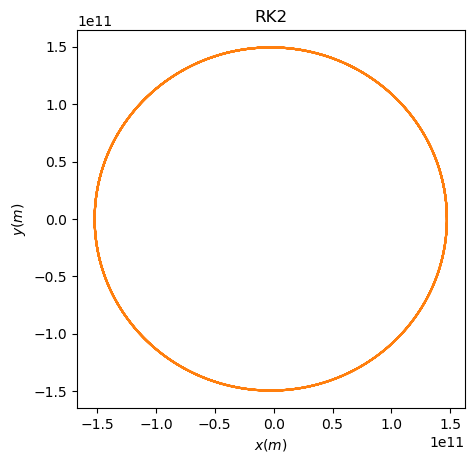

In [76]:
## rk2 with array method 

# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import cos, exp, log, pi, sin, sqrt

# SciPy
import scipy.integrate as ode

#constants
G=6.6738*10**-11 #m^3 kg^-1 s^-2
M=1.9891*10**30 #kg

#initial conditions  -let sun be origin 
x_initial=1.4710 * 10**11 #m   (x,0) par to line
v_initial=3.0287 * 10**4  #m/s (0,y) perp to line


p0=np.array([x_initial, 0, 0, v_initial])

#print(v0)
#print(r0)


h=1 #1 hour
h=3600 #1 hr in secs
dt=3600

## time steps
st=10

def a(t,p): #where r=r(x,y) and r" will also have comp.s (x,y) returns a_x and a_y
    x=p[0]
    y=p[1]
    vx=p[2]
    vy=p[3]
    
    r=np.zeros(4)
    r[0] = vx #x1
    r[1] = vy #x2
    
    
    d=sqrt(x**2+y**2)
    r[2]= -(G*M*x)  /  (d**3)
    r[3]= -(G*M*y)  /  (d**3)
    return r


def rk2(f, t0, tf, p0, dt):  ##where p0 is a 1 d array with 4 elements x10,w10,x20,w20
    t=np.array([t0])
    p=np.array([p0])
    k1=np.zeros(len(p0))
    k2=np.zeros(len(p0))
    
    
    while t[-1] < tf:
        k1 = dt*a(t[-1], p[-1]) #k1 
        k2 = dt*a(t[-1] + .5*dt , p[-1] + .5*k1) #k2 
                    
        t=np.vstack((t,t[-1]+dt))
        p=np.vstack((p, p[-1] + k2 ))
        
    return p,t


def verlot(f, t0, tf, p0, dt): 
    t=np.array([t0])
    p=np.array([p0])
    k1=np.zeros(len(p0))
    k2=np.zeros(len(p0))
    
    
    while t[-1] < tf:
        k1 = dt*a(t[-1], p[-1]) #k1 
        k2 = dt*a(t[-1] + .5*dt , p[-1] + .5*k1) #k2 
                    
        t=np.vstack((t,t[-1]+dt))
        p=np.vstack((p, p[-1] + k2 ))
        
    return p,t


v0=np.array([0, v_initial])
x0=np.array([x_initial, 0])


t0= 0.0
tf= 50000*60*60 ##3 hr in s
dt=3600
p, t = rk2(a, t0, tf, p0, dt)

x= p[0:len(t),0]
y= p[0:len(t),1]
vx= p[0:len(t),2]
vy= p[0:len(t),3]




# Plot
plt.figure(figsize=(5,5),dpi=100)
plt.plot( x, y, 'C1')
plt.ylabel(r'$y(m)$')
plt.xlabel(r'$x(m)$')
plt.title("RK2")

plt.show()
    


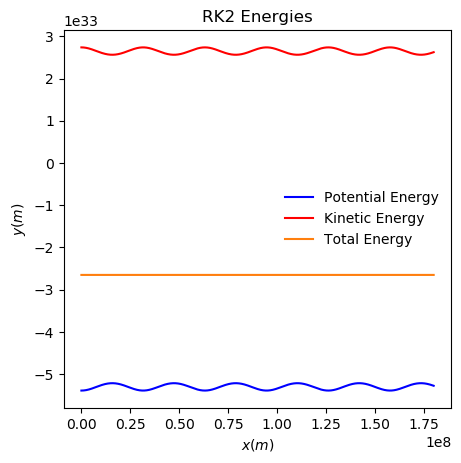

In [79]:
##rk2 energies

# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import cos, exp, log, pi, sin, sqrt

# SciPy
import scipy.integrate as ode

#constants
G=6.6738*10**-11 #m^3 kg^-1 s^-2
M=1.9891*10**30 #kg

#initial conditions  -let sun be origin 
x_initial=1.4710 * 10**11 #m   (x,0) par to line
v_initial=3.0287 * 10**4  #m/s (0,y) perp to line


p0=np.array([x_initial, 0, 0, v_initial])

#print(v0)
#print(r0)


h=1 #1 hour
h=3600 #1 hr in secs
dt=3600

## time steps
st=10

def a(t,p): #where r=r(x,y) and r" will also have comp.s (x,y) returns a_x and a_y
    x=p[0]
    y=p[1]
    vx=p[2]
    vy=p[3]
    
    r=np.zeros(4)
    r[0] = vx #x1
    r[1] = vy #x2
    
    
    d=sqrt(x**2+y**2)
    r[2]= -(G*M*x)  /  (d**3)
    r[3]= -(G*M*y)  /  (d**3)
    return r

def En(p): 
    rx=p[0]
    ry=p[1]
    
    vx=p[2]
    vy=p[3]
    
    d=sqrt(rx**2 + ry**2)
    s=sqrt(vx**2 + vy**2)
    
    U= -(G*M*m)/(d)
    T= .5*m*(s**2)
    return U, T, U+T
   

def rk2(f, t0, tf, p0, dt):  ##where p0 is a 1 d array with 4 elements x10,w10,x20,w20
    t=np.array([t0])
    p=np.array([p0])
    k1=np.zeros(len(p0))
    k2=np.zeros(len(p0))
    
    U0,T0,E0=En(p0)
    E=np.array([U0, T0, E0])
    
    while t[-1] < tf:
        k1 = dt*a(t[-1], p[-1]) #k1 
        k2 = dt*a(t[-1] + .5*dt , p[-1] + .5*k1) #k2 
                    
        t=np.vstack((t,t[-1]+dt))
        p=np.vstack((p, p[-1] + k2 ))
        E=np.vstack((E, En(p[-1])))
        
    return p,t,E

v0=np.array([0, v_initial])
x0=np.array([x_initial, 0])


t0= 0.0
tf= 50000*60*60 ##3 hr in s
dt=3600
p, t, E = rk2(a, t0, tf, p0, dt)

x= p[0:len(t),0]
y= p[0:len(t),1]
vx= p[0:len(t),2]
vy= p[0:len(t),3]

U=E[0:len(t),0]
T=E[0:len(t),1]
Ener=E[0:len(t),2]


# Plot
plt.figure(figsize=(5,5),dpi=100)
plt.plot( t2, U, 'C1', color='blue',label="Potential Energy")
plt.plot( t2, T, 'C1', color='red',label="Kinetic Energy")
plt.plot( t2, Ener, 'C1',label="Total Energy")
plt.ylabel(r'$y(m)$')
plt.xlabel(r'$x(m)$')
plt.title("RK2 Energies")
plt.legend()
plt.show()
    

In this case Verlot has added benefits compared to the RK2 method because the RK2 method does not perfectly trace itself while verlot does. In this case Verlot more accurately represents that the planet moves in a closed and bound orbit while RK2 portrays it(incorrectly) as an open orbit. 

### 2)  Exercise 8.15 : The double pendulum

Notes: 

for part b the time scale is constrained within the problem's requirements for energy variation

For part c I used a sliding interact widgit to let you pick a time (in seconds, range 0 to 100) instead of picking times to print. This is (hopefully an acceptable) way of neatly organizing frames of motion.

part b: energy vs time

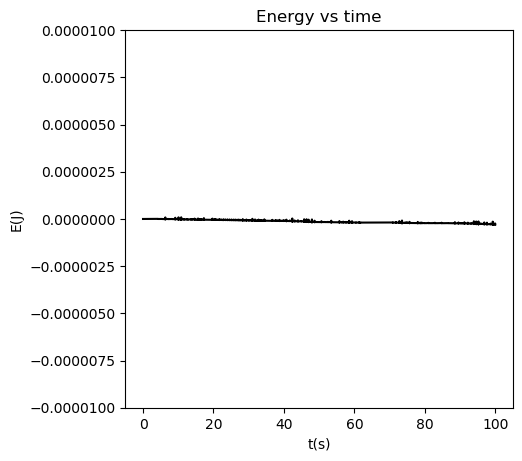

In [11]:
#widgets 
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual,IntSlider,FloatSlider
import ipywidgets as widgets

#b rk4 for 4 variables
# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import cos, exp, log, pi, sin, sqrt

# SciPy
import scipy.integrate as ode

mpl.rcParams['legend.frameon']   = False

m=1 #kg
l= .40 #m
g= -9.8

x10, x20, w10, w20 = pi/2, pi/2, 0, 0
p0=np.array([x10,x20,w10,w20])

                    
def f(t, p):
    x1=p[0]
    x2=p[1]
    w1=p[2]           
    w2=p[3]            
                    
                    
    r=np.zeros(4)
    r[0] = w1 #x1
    r[1] = w2 #x2
    
    n= ((w1**2)*sin(2*x1 - 2*x2)  +  2*(w2**2)*sin(x1-x2)  + (g/l)*( sin(x1 - 2*x2) + 3*sin(x1) ) )/(3 - cos(2*x1 - 2*x2))
    #d= 3 - cos(2*x1 - 2*x2)                
    r[2]= -n #w1
                    
    n= (4*(w1**2)*sin(x1 - x2)  +  (w2**2)*sin(2*x1 - 2*x2)  +  2*(g/l)*( sin(2*x1 - x2) - sin(x2)  ))/(3 - cos(2*x1 - 2*x2) )
    #d= 3 - cos(2*x1 - 2*x2)               
    r[3]= n
                    
    return r #a 1 by 4 array with order for: x1,x2,w1,w2           

def rk4(f, t0, tf, p0, dt):  ##where p0 is a 1 d array with 4 elements x10,w10,x20,w20
    t=np.array([t0])
    p=np.array([p0])
    E=np.array(ener(t0,p0))
    k1=np.zeros(4)
    k2=np.zeros(4)
    k3=np.zeros(4)
    k4=np.zeros(4)
    
    while t[-1] < tf:
        k1 = dt*f(t[-1], p[-1]) #k1 
        k2 = dt*f(t[-1] + .5*dt , p[-1] + .5*k1) #k2 
        k3 = dt*f(t[-1] + .5*dt , p[-1] + .5*k2) #k3 
        k4 = dt*f(t[-1] + dt, p[-1] + k3) #k4
                    
        t=np.vstack((t,t[-1]+dt))
        p=np.vstack((p, p[-1] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)) )
        
        E=np.vstack((E,ener(t[-1],p[-1])))
    return p,t,E

def ener(t,p):
    x1=p[0]
    x2=p[1]
    w1=p[2]           
    w2=p[3] 

    E=(m*(l**2))*(  (w1**2) + .5*(w2**2) + w1*w2*cos(x1-x2)  ) - m*g*l*(2*cos(x1)+cos(x2))
    return E

t0 = 0
tf = 100
dt=.001

p, t, E = rk4(f, t0, tf, p0, dt)
x1= p[0:len(t),0]
x2= p[0:len(t),1]
w1= p[0:len(t),2]
w2= p[0:len(t),3]




plt.figure(figsize=(5,5),dpi=100)
plt.plot(t, E, 'k-', color='black');
#plt.xlim([-1,1])
plt.ylim([-1e-5,1e-5])
plt.ylabel('E(J)')
plt.xlabel('t(s)')
plt.title("Energy vs time")


plt.show()





Part c: motion of pendulum

In [18]:
#widgets 
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual,IntSlider,FloatSlider
import ipywidgets as widgets

#b rk4 for 4 variables
# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import cos, exp, log, pi, sin, sqrt

# SciPy
import scipy.integrate as ode

mpl.rcParams['legend.frameon']   = False

m=1 #kg
l= .40 #m
g= -9.8

x10, x20, w10, w20 = pi/2, pi/2, 0, 0
p0=np.array([x10,x20,w10,w20])

                    
def f(t, p):
    x1=p[0]
    x2=p[1]
    w1=p[2]           
    w2=p[3]            
                    
                    
    r=np.zeros(4)
    r[0] = w1 #x1
    r[1] = w2 #x2
    
    n= ((w1**2)*sin(2*x1 - 2*x2)  +  2*(w2**2)*sin(x1-x2)  + (g/l)*( sin(x1 - 2*x2) + 3*sin(x1) ) )/(3 - cos(2*x1 - 2*x2))
    #d= 3 - cos(2*x1 - 2*x2)                
    r[2]= -n #w1
                    
    n= (4*(w1**2)*sin(x1 - x2)  +  (w2**2)*sin(2*x1 - 2*x2)  +  2*(g/l)*( sin(2*x1 - x2) - sin(x2)  ))/(3 - cos(2*x1 - 2*x2) )
    #d= 3 - cos(2*x1 - 2*x2)               
    r[3]= n
                    
    return r #a 1 by 4 array with order for: x1,x2,w1,w2           

def rk4(f, t0, tf, p0, dt):  ##where p0 is a 1 d array with 4 elements x10,w10,x20,w20
    t=np.array([t0])
    p=np.array([p0])
    E=np.array(ener(t0,p0))
    k1=np.zeros(4)
    k2=np.zeros(4)
    k3=np.zeros(4)
    k4=np.zeros(4)
    
    while t[-1] < tf:
        k1 = dt*f(t[-1], p[-1]) #k1 
        k2 = dt*f(t[-1] + .5*dt , p[-1] + .5*k1) #k2 
        k3 = dt*f(t[-1] + .5*dt , p[-1] + .5*k2) #k3 
        k4 = dt*f(t[-1] + dt, p[-1] + k3) #k4
                    
        t=np.vstack((t,t[-1]+dt))
        p=np.vstack((p, p[-1] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)) )
        
        E=np.vstack((E,ener(t[-1],p[-1])))
    return p,t,E

def ener(t,p):
    x1=p[0]
    x2=p[1]
    w1=p[2]           
    w2=p[3] 

    E=(m*(l**2))*(  (w1**2) + .5*(w2**2) + w1*w2*cos(x1-x2)  ) - m*g*l*(2*cos(x1)+cos(x2))
    return E

t0 = 0
tf = 100
dt=.001

p, t, E = rk4(f, t0, tf, p0, dt)
x1= p[0:len(t),0]
x2= p[0:len(t),1]
w1= p[0:len(t),2]
w2= p[0:len(t),3]


def slow_function(T):
    T=T*int(1/dt)
    print(E[T,0])
    plt.figure(figsize=(5,5),dpi=100)
    #plt.plot( t, x1, 'C1', label='RK2')
    x1l=np.array([0,l*sin(x1[T])])
    y1l=np.array([0,l*cos(x1[T])])
    x2l=np.array([x1l[1],x1l[1]+l*sin(x2[T])])
    y2l=np.array([y1l[1],y1l[1]+l*cos(x2[T])])
    plt.plot(x1l,y1l, 'ko-', color='black');
    plt.plot(x2l, y2l, 'ko-', color='black');
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    plt.ylabel('x')
    plt.xlabel('t')
    plt.title("RK2")
    #plt.legend()

    plt.show()
    return

print("Time in seconds from release position")
interact_manual(slow_function,T=IntSlider(min=t0, max=tf, step=1));#,Distance=FloatSlider(min=-2, max=2, step=1*10**-2));    

Time in seconds from release position


interactive(children=(IntSlider(value=0, description='T'), Button(description='Run Interact', style=ButtonStyl…

### 3) Shooting Hoops

from scipy:
the initial velocity is 8.840428808146665 m/s, at an angle of 45 degrees above the horizontal axis

written bisection method:
the initial velocity is 8.840428806841373 m/s, at an angle of 45 degrees above the horizontal axis

the shot takes 1.0727999999998983 seconds


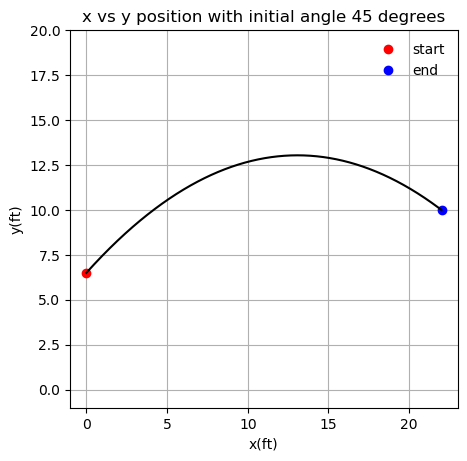

In [87]:
#b rk4 for 4 variables
# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import cos, exp, log, pi, sin, sqrt

# SciPy
import scipy.integrate as ode

# SciPy
import scipy.optimize as optimize



mpl.rcParams['legend.frameon']   = False

vi=8.9
x0, y0, vx0, vy0  = 0, 1.9812, vi*cos(pi/4), vi*sin(pi/4)  ##6.5=1.9812, 22=6.7056

p0=np.array([x0,y0,vx0,vy0])

xf=6.7056
yf=3.048

def rk4(f, t0, p0, dt):  ##where p0 is a 1 d array with 4 elements x10,w10,x20,w20
    t=np.array([t0])
    p=np.array([p0])
    
    k1=np.zeros(4)
    k2=np.zeros(4)
    k3=np.zeros(4)
    k4=np.zeros(4)
    
    while p[-1,0] < xf:
        k1 = dt*f(t[-1], p[-1]) #k1 
        k2 = dt*f(t[-1] + .5*dt , p[-1] + .5*k1) #k2 
        k3 = dt*f(t[-1] + .5*dt , p[-1] + .5*k2) #k3 
        k4 = dt*f(t[-1] + dt, p[-1] + k3) #k4
                    
        t=np.vstack((t,t[-1]+dt))
        p=np.vstack((p, p[-1] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)) )
    return p,t

def finder_rk(v):  ##where p0 is a 1 d array with 4 elements x10,w10,x20,w20
    vx0, vy0  =  v*cos(pi/4), v*sin(pi/4)  ##6.5=1.9812, 22=6.7056
    p0=np.array([x0,y0,vx0,vy0])
    t0=0
    dt=.0001
    t=np.array([t0])
    p=np.array([p0])
    
    k1=np.zeros(4)
    k2=np.zeros(4)
    k3=np.zeros(4)
    k4=np.zeros(4)
    
    while p[-1,0] < xf:
        k1 = dt*f(t[-1], p[-1]) #k1 
        k2 = dt*f(t[-1] + .5*dt , p[-1] + .5*k1) #k2 
        k3 = dt*f(t[-1] + .5*dt , p[-1] + .5*k2) #k3 
        k4 = dt*f(t[-1] + dt, p[-1] + k3) #k4
                    
        t=np.vstack((t,t[-1]+dt))
        p=np.vstack((p, p[-1] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)) )
    return p[-1,1] - 3.048

def f(t, p):
    x=p[0]
    y=p[1]
    vx=p[2]           
    vy=p[3]   
                     
    r=np.zeros(4)
    r[0] = vx
    r[1] = vy     
    r[2] = 0                
    r[3] = -9.8
                    
    return r #a 1 by 4 array with order for: x1,x2,w1,w2           

def bisection(f, x1, x2):
    # Set limits
    accuracy = 1E-9
    Nmax     = 1000
    
    # Init and check
    f1 = f(x1)
    f2 = f(x2)
    if f1*f2 > 0:
        return
    
    # Iterate
    i     = 0
    delta = 1
    
    while abs(delta) > accuracy and i < Nmax:
        # Increment
        i += 1
        
        # Midpoint
        xc    = (x1 + x2)/2
        fc    = f(xc)
        delta = (xc - x1)/xc
        
        # Check
        if f1*fc > 0:
            x1 = xc
            f1 = fc
        else:
            x2 = xc
            f2 = fc
    
    return xc, i, delta




v= optimize.newton(finder_rk, vi, tol=1E-9, full_output=False)
print("from scipy:")
print("the initial velocity is",v,"m/s, at an angle of 45 degrees above the horizontal axis")
print("")

v,i,delta= bisection(finder_rk, 8,9)
print("written bisection method:")
print("the initial velocity is",v,"m/s, at an angle of 45 degrees above the horizontal axis")
print("")

x0, y0, vx0, vy0  = 0, 1.9812, v*cos(pi/4), v*sin(pi/4)  ##6.5=1.9812, 22=6.7056
p0=np.array([x0,y0,vx0,vy0])


t0 = 0
dt=.0001

p, t = rk4(f, t0, p0, dt)
print("the shot takes", t[-1,0], "seconds")
x= p[0:len(t),0]*3.28084
y= p[0:len(t),1]*3.28084
vx= p[0:len(t),2]
vy= p[0:len(t),3]

# Plot
plt.figure(figsize=(5,5),dpi=100)
plt.plot(0,6.5, 'ko', color='red',label="start");
plt.plot(22, 10, 'ko', color='blue',label="end");
plt.plot( x, y, 'C1',color='black') #label='RK2')
plt.ylabel('y(ft)')
plt.xlabel('x(ft)')
plt.title("x vs y position with initial angle 45 degrees")
plt.grid(True)
plt.xlim([-1,23])
plt.ylim([-1,20])

plt.legend()

plt.show()



In [95]:
#b rk4 for 4 variables
# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import cos, exp, log, pi, sin, sqrt

# SciPy
import scipy.integrate as ode

# SciPy
import scipy.optimize as optimize
from scipy.optimize import minimize, rosen, rosen_der



mpl.rcParams['legend.frameon']   = False

vi=8.9
oi=pi/4
x0, y0, vx0, vy0  = 0, 1.9812, vi*cos(oi), vi*sin(oi)  ##6.5=1.9812, 22=6.7056
p0=np.array([x0,y0,vx0,vy0])

xf=6.7056
yf=3.048

g=-9.8

N = 2

def rk4(f, t0, p0, dt):  ##where p0 is a 1 d array with 4 elements x10,w10,x20,w20
    t=np.array([t0])
    p=np.array([p0])
    
    k1=np.zeros(4)
    k2=np.zeros(4)
    k3=np.zeros(4)
    k4=np.zeros(4)
    
    while p[-1,0] < xf:
        k1 = dt*f(t[-1], p[-1]) #k1 
        k2 = dt*f(t[-1] + .5*dt , p[-1] + .5*k1) #k2 
        k3 = dt*f(t[-1] + .5*dt , p[-1] + .5*k2) #k3 
        k4 = dt*f(t[-1] + dt, p[-1] + k3) #k4
                    
        t=np.vstack((t,t[-1]+dt))
        p=np.vstack((p, p[-1] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)) )
    return p,t

def finder_rk(v):  ##where p0 is a 1 d array with 4 elements x10,w10,x20,w20
    vx0, vy0  =  v*cos(pi/4), v*sin(pi/4)  ##6.5=1.9812, 22=6.7056
    p0=np.array([x0,y0,vx0,vy0])
    t0=0
    dt=.0001
    t=np.array([t0])
    p=np.array([p0])
    
    k1=np.zeros(4)
    k2=np.zeros(4)
    k3=np.zeros(4)
    k4=np.zeros(4)
    
    while p[-1,0] < xf:
        k1 = dt*f(t[-1], p[-1]) #k1 
        k2 = dt*f(t[-1] + .5*dt , p[-1] + .5*k1) #k2 
        k3 = dt*f(t[-1] + .5*dt , p[-1] + .5*k2) #k3 
        k4 = dt*f(t[-1] + dt, p[-1] + k3) #k4
                    
        t=np.vstack((t,t[-1]+dt))
        p=np.vstack((p, p[-1] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)) )
    return p[-1,1] - 3.048

def f(t, p):
    x=p[0]
    y=p[1]
    vx=p[2]           
    vy=p[3]   
                     
    r=np.zeros(4)
    r[0] = vx
    r[1] = vy     
    r[2] = 0                
    r[3] = -9.8
                    
    return r #a 1 by 4 array with order for: x1,x2,w1,w2           

####
def wv(v,o): ##v,o
    return -((g*(xf**2))/(cos(o)**2))*(1/v**3)+sin(o)
    
def wo(v,o):
    return (g*((xf**2)/(v**2))*(sin(o)/(cos(o)**3)))+v*cos(o)

def parX(f,x,y): #put wx or wy
    return (f(x+h,y)-f(x-h,y))/(2*h)
    
def parY(f,x,y):
    return (f(x,y+h)-f(x,y-h))/(2*h)

def J(x,y):#f1,f2,x,y wX then
    J=np.array([[ 0,  0],
             [ 0,  0]],float)
    J[0][0]=parX(wv,x,y)
    J[0][1]=parY(wv,x,y)
    J[1][0]=parX(wo,x,y)
    J[1][1]=parY(wo,x,y)

    return J

def piv(c,A,b):
    a=[row[c] for row in A]
    r=[column[c] for column in A]
    a=np.absolute(a)
    pivot = np.where(a==np.amax(a))
    pivot=pivot[0][0]
    return pivot

def partial(c,A,b):
    pivot=piv(c,A,b)
    #swap the max value with the top 
    if(pivot>c):
        sw_down=np.zeros([A.shape[1]])
        sw_up=np.zeros([A.shape[1]])
        for u in range(c,A.shape[1]):
            sw_down[u]=A[c][u]
            sw_up[u]=A[pivot][u]
    
        for u in range(c,A.shape[1]):
            A[c][u]=sw_up[u]
            A[pivot][u]=sw_down[u]
        
        b_down=b[c]
        b_up=b[pivot]
            
        b[c]=b_up
        b[pivot]=b_down
    
##A will be jacobian, v is f(x_guess)    (2x2 and 1x2)
def Gaussian(A,v):
    # Gaussian elimination
    for m in range(N):
        # Partial pivot
        partial(m,A,v)

        # Divide by the diagonal element
        div = A[m,m]
        A[m,:] /= div
        v[m] /= div

    # Now subtract from the lower rows
        for i in range(m+1,N):
            mult = A[i,m]
            A[i,:] -= mult*A[m,:]
            v[i] -= mult*v[m]
        
# Backsubstitution
    x = np.empty(N,float)
    for m in range(N-1,-1,-1):
        x[m] = v[m]
        for i in range(m+1,N):
            x[m] -= A[m,i]*x[i]
    return x

#### need here solve for vector del r(x,y) using jacobian and gauss
def delrScipy(x,y):
    vec_fgeuss=np.array([ wv(x,y),  wo(x,y)],float)
    Jacobian=J(x,y)
    del_r=np.linalg.solve(Jacobian, vec_fgeuss)
    x_comp=del_r[0]
    y_comp=del_r[1]
    return x_comp, y_comp

def delrWithmyGauss(x,y):
    vec_fgeuss=np.array([ wv(x,y),  wo(x,y)],float)
    Jacobian=J(x,y)
    del_r=Gaussian(Jacobian,vec_fgeuss)
    x_comp=del_r[0]
    y_comp=del_r[1]
    return x_comp, y_comp

def secant(r_min,tol,g):
    iter=0
    r_ip=np.array([0,0],float)
    r_i=np.array([0,0],float)
    delx, dely = g(r_min[0],r_min[1])
    r_ip[0] = r_min[0]  -  delx 
    r_ip[1] = r_min[1]  -  dely 
    
    while(sqrt((r_i[0]-r_ip[0])**2 + (r_i[1]-r_ip[1])**2 )>tol): #or iter==0):
        iter=iter+1
        r_i[0]= r_ip[0]
        r_i[1]= r_ip[1]
        delx, dely = g(r_i[0],r_i[1])
        r_ip[0] = r_i[0]  -  delx #xcomp
        r_ip[1] = r_i[1]  -  dely #ycomp
    v=r_ip[0]
    o=r_ip[1]
    return v,o



vi=9
oi=pi/4+.001
tol=.000001
r_min=np.array([ vi,  oi],float)
v,o=secant(r_min,tol,delrScipy)
print(v,o)
####

vi=9
oi=pi/4+.001
x0, y0, vx0, vy0  = 0, 1.9812, vi*cos(oi), vi*sin(oi)  ##6.5=1.9812, 22=6.7056
p0=np.array([x0,y0,vx0,vy0])

#v= optimize.newton(finder_rk, vi, tol=1E-9, full_output=False)

print("the velocity is",v,"m/s, at an angle of 45 degrees above the horizontal axis")




x0, y0, vx0, vy0  = 0, 1.9812, v*cos(oi), v*sin(oi)  ##6.5=1.9812, 22=6.7056
p0=np.array([x0,y0,vx0,vy0])





t0 = 0
dt=.01

#p, t = rk4(f, t0, p0, dt)
print("the shot takes", t[-1,0], "seconds")
#x= p[0:len(t),0]*3.28084
#y= p[0:len(t),1]*3.28084
#vx= p[0:len(t),2]
#vy= p[0:len(t),3]

# Plot
plt.figure(figsize=(5,5),dpi=100)
#plt.plot(0,6.5, 'ko', color='red',label="start");
#plt.plot(22, 10, 'ko', color='blue',label="end");
plt.plot( x, y, 'C1',color='black') #label='RK2')
plt.ylabel('y(ft)')
plt.xlabel('x(ft)')
plt.title("x vs y for optimized end position")
plt.grid(True)
plt.xlim([-1,23])
plt.ylim([-1,20])

plt.legend()

plt.show()



LinAlgError: Singular matrix